In [10]:
import os
import imageio.v2 as imageio
import torch

## Image representation
### An image is	represented	as a collection	of scalars arranged	in a grid with a height and	a width  
* individual pixels are often encoded using 8-bit integers, as in consumer cameras
* in medical, scientific, and industrial applications, it is not unusual to find higher numerical precision, such as 12-bit or 16-bit
###  Three color channel (C)	
* • Image color is defined by three numbers representing the intensity of red, green, and blue (RGB)

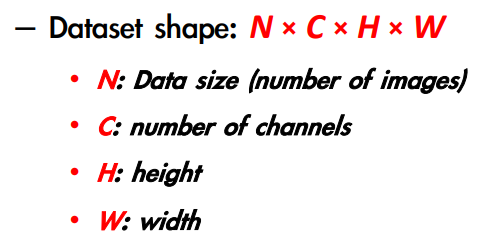

In [9]:
img_arr = imageio.imread(os.path.join(os.path.pardir, os.path.pardir, "_00_data", "a_image-dog", "bobby.jpg"))
print(type(img_arr)) # <class 'numpy.ndarray'>
print(img_arr.shape) # (720, 1280, 3) 
print(img_arr.dtype) # uint8 : 0 ~ 255 (individual pixel)

img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1) # (H, W, C) -> (C, H, W)
print(out.shape) # torch.Size([3, 720, 1280])

<class 'numpy.ndarray'>
(720, 1280, 3)
uint8
torch.Size([3, 720, 1280])


In [25]:
csv_ex = "example.csv"
print(os.path.splitext(csv_ex)[0])
print(os.path.splitext(csv_ex)[1])
print(os.path.splitext(csv_ex)[-1])

example
.csv
.csv


In [27]:
data_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")
filenames = [
  name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png'
]
print(filenames) # ['cat1.png', 'cat2.png', 'cat3.png']

from PIL import Image

for i, filename in enumerate(filenames):
  image = Image.open(os.path.join(data_dir, filename))
  image.show()
  img_arr = imageio.imread(os.path.join(data_dir, filename))
  print(img_arr.shape) # (256, 256, 3)
  print(img_arr.dtype) # uint8
  print()

['cat1.png', 'cat2.png', 'cat3.png']
(256, 256, 3)
uint8

(256, 256, 3)
uint8

(256, 256, 3)
uint8



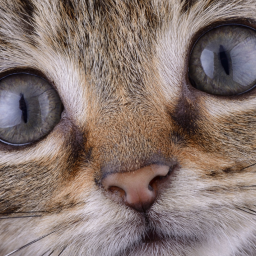 **cat1**
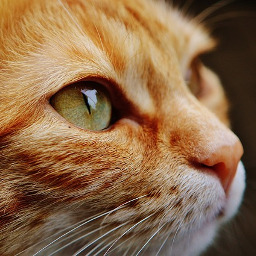 **cat2**
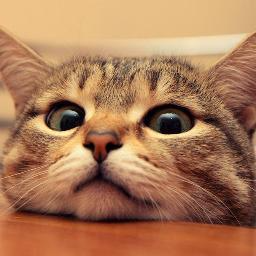 **cat3**

In [41]:
a = torch.zeros(3, 5, 5)
a[0], a[1]

(tensor([[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]))

In [46]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8) # (3, 3, 256, 256)

for i, filename in enumerate(filenames):
  img_arr = imageio.imread(os.path.join(data_dir, filename)) # Load image in numpy array
  img_t = torch.from_numpy(img_arr) # Transfer numpy array to Torch tensor 
  img_t = img_t.permute(2, 0, 1) # (256, 256, 3) -> (3, 256, 256)
  batch[i] = img_t

print(batch.shape) # torch.Size([3, 3, 256, 256])

torch.Size([3, 3, 256, 256])


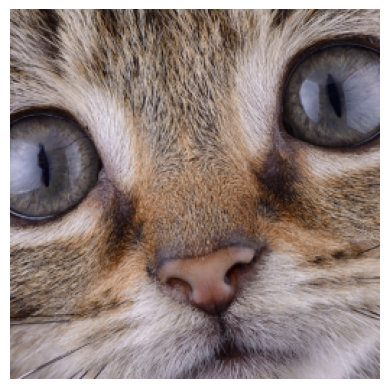

In [50]:
import matplotlib.pyplot as plt

img_t = batch[0]
img_t = img_t.permute(1,2,0)
img_np = img_t.numpy()
plt.imshow(img_np)
plt.axis("off")
plt.show()

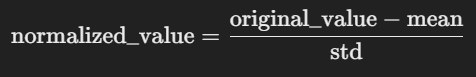

In [54]:
# just divide the values of the pixels by 255 
# 255 is the maximum representable number in 8-bit unsigned 
batch = batch.float()
batch /= 255.0
print(batch.dtype) # torch.float32
print(batch.shape) # torch.Size([3, 3, 256, 256])

n_channels = batch.shape[1]

# the output has zero mean and unit standard deviation across each channel 
for c in range(n_channels):
  mean = torch.mean(batch[:, c]) # batch[:, c] == batch[:, c, :, :]
  std = torch.std(batch[:, c])
  print(mean, std)
  batch[:, c] = (batch[:, c] - mean) / std


torch.float32
torch.Size([3, 3, 256, 256])
tensor(1.9403e-11) tensor(0.0039)
tensor(-3.8805e-11) tensor(0.0039)
tensor(0.) tensor(0.0039)
